In [2]:
import pandas as pd

# Load the datasets
df_sleep = pd.read_csv("sleep_records.csv")   # or "sleep_data.csv"
df_decisions = pd.read_csv("decision_logs.csv")  # or "decisions.csv"

# Print dataset sizes
print("Sleep data shape:", df_sleep.shape)
print("Decisions shape:", df_decisions.shape)

# Preview the first rows
print("\n--- Sleep Data Sample ---")
print(df_sleep.head())

print("\n--- Decisions Data Sample ---")
print(df_decisions.head())

Sleep data shape: (1095, 8)
Decisions shape: (5470, 6)

--- Sleep Data Sample ---
         date bedtime waketime  interruptions  sleep_quality  dream_intensity  \
0  2022-01-01   21:00    05:13              1           6.75             4.72   
1  2022-01-02   22:00    06:01              0           9.28             4.53   
2  2022-01-03   21:00    03:16              1           8.37             6.53   
3  2022-01-04   22:45    05:24              2           5.81             4.07   
4  2022-01-05   22:45    05:46              1           6.36             1.17   

   caffeine  stress  
0         0    6.30  
1         1    4.53  
2         0    4.06  
3         0    4.07  
4         0    1.55  

--- Decisions Data Sample ---
         date   time decision_type  decision_quality  confidence  energy
0  2022-01-01  21:13    Analytical              8.38        8.05    6.33
1  2022-01-01  20:13      Creative              4.68        4.39    9.59
2  2022-01-01  10:13    Analytical              2

In [3]:
# Step 2: Merge datasets on the 'date' column
df_merged = pd.merge(df_decisions, df_sleep, on="date", how="left")

print("Merged data shape:", df_merged.shape)

# Preview merged dataset
print("\n--- Merged Data Sample ---")
print(df_merged.head())


Merged data shape: (5470, 13)

--- Merged Data Sample ---
         date   time decision_type  decision_quality  confidence  energy  \
0  2022-01-01  21:13    Analytical              8.38        8.05    6.33   
1  2022-01-01  20:13      Creative              4.68        4.39    9.59   
2  2022-01-01  10:13    Analytical              2.39        3.67    7.43   
3  2022-01-01  12:13    Analytical              4.31        3.23   10.00   
4  2022-01-01  13:13        Social              4.20        3.05    9.02   

  bedtime waketime  interruptions  sleep_quality  dream_intensity  caffeine  \
0   21:00    05:13              1           6.75             4.72         0   
1   21:00    05:13              1           6.75             4.72         0   
2   21:00    05:13              1           6.75             4.72         0   
3   21:00    05:13              1           6.75             4.72         0   
4   21:00    05:13              1           6.75             4.72         0   

   stress 

In [4]:
# Step 3: Basic Analysis

# Correlation between sleep and decision metrics
print("\n--- Correlation Matrix ---")
print(df_merged[["sleep_quality", "sleep_hours", "decision_quality", "confidence"]].corr())

# Average decision quality by decision type
print("\n--- Average Decision Quality by Type ---")
print(df_merged.groupby("decision_type")["decision_quality"].mean())

# Impact of caffeine (average decision quality with/without caffeine)
print("\n--- Caffeine Impact ---")
print(df_merged.groupby("caffeine")["decision_quality"].mean())

# Impact of interruptions (average confidence)
print("\n--- Interruptions vs Confidence ---")
print(df_merged.groupby("interruptions")["confidence"].mean())



--- Correlation Matrix ---


KeyError: "['sleep_hours'] not in index"

In [5]:
# Step 3 (Fixed) - Add sleep_hours first

# Convert bedtime and waketime into datetime
df_merged["bedtime_dt"] = pd.to_datetime(df_merged["bedtime"], format="%H:%M")
df_merged["waketime_dt"] = pd.to_datetime(df_merged["waketime"], format="%H:%M")

# Handle case where wake time is on the next day
df_merged.loc[df_merged["waketime_dt"] < df_merged["bedtime_dt"], "waketime_dt"] += pd.Timedelta(days=1)

# Calculate sleep hours
df_merged["sleep_hours"] = (df_merged["waketime_dt"] - df_merged["bedtime_dt"]).dt.total_seconds() / 3600

# Now correlation analysis
print("\n--- Correlation Matrix ---")
print(df_merged[["sleep_quality", "sleep_hours", "decision_quality", "confidence", "energy", "stress"]].corr())



--- Correlation Matrix ---
                  sleep_quality  sleep_hours  decision_quality  confidence  \
sleep_quality          1.000000     0.019605          0.798465    0.740985   
sleep_hours            0.019605     1.000000          0.016902    0.016179   
decision_quality       0.798465     0.016902          1.000000    0.929930   
confidence             0.740985     0.016179          0.929930    1.000000   
energy                 0.689891     0.012252          0.536696    0.495078   
stress                -0.004548     0.017159         -0.069232   -0.069455   

                    energy    stress  
sleep_quality     0.689891 -0.004548  
sleep_hours       0.012252  0.017159  
decision_quality  0.536696 -0.069232  
confidence        0.495078 -0.069455  
energy            1.000000 -0.008116  
stress           -0.008116  1.000000  


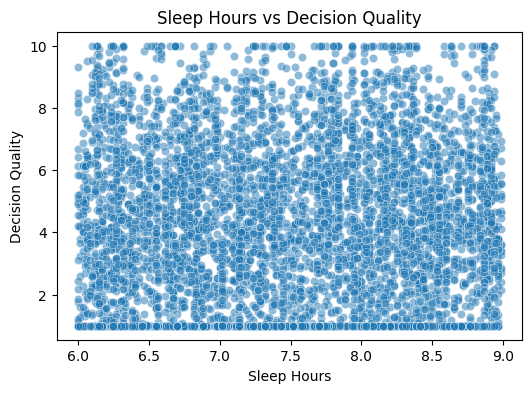

C:\Users\knare\AppData\Local\Temp\ipykernel_3932\477068406.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="decision_type", y="decision_quality", data=df_merged, ci=None)


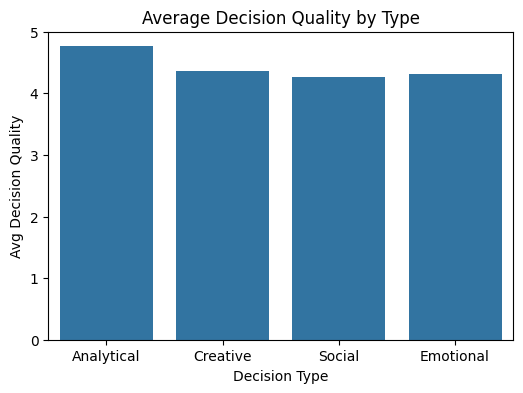

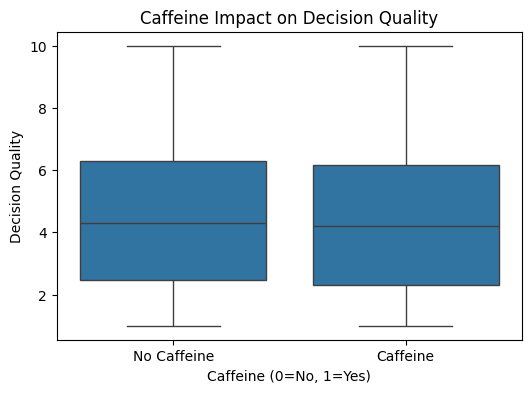

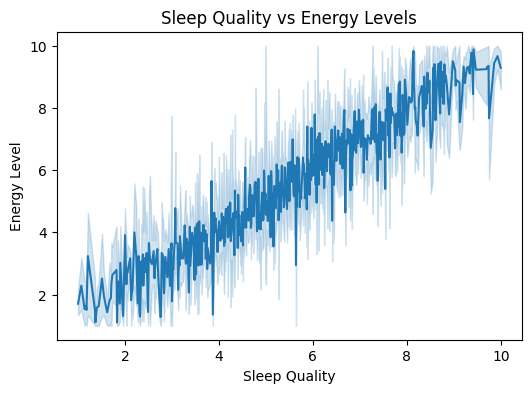

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Sleep Hours vs Decision Quality (scatter)
plt.figure(figsize=(6,4))
sns.scatterplot(x="sleep_hours", y="decision_quality", data=df_merged, alpha=0.5)
plt.title("Sleep Hours vs Decision Quality")
plt.xlabel("Sleep Hours")
plt.ylabel("Decision Quality")
plt.show()

# 2. Average Decision Quality by Type (bar plot)
plt.figure(figsize=(6,4))
sns.barplot(x="decision_type", y="decision_quality", data=df_merged, ci=None)
plt.title("Average Decision Quality by Type")
plt.xlabel("Decision Type")
plt.ylabel("Avg Decision Quality")
plt.show()

# 3. Caffeine Impact on Decision Quality (box plot)
plt.figure(figsize=(6,4))
sns.boxplot(x="caffeine", y="decision_quality", data=df_merged)
plt.title("Caffeine Impact on Decision Quality")
plt.xlabel("Caffeine (0=No, 1=Yes)")
plt.ylabel("Decision Quality")
plt.xticks([0,1], ["No Caffeine","Caffeine"])
plt.show()

# 4. Sleep Quality vs Energy (line plot)
plt.figure(figsize=(6,4))
sns.lineplot(x="sleep_quality", y="energy", data=df_merged)
plt.title("Sleep Quality vs Energy Levels")
plt.xlabel("Sleep Quality")
plt.ylabel("Energy Level")
plt.show()


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Select features (sleep factors) and target (decision quality)
features = ["sleep_hours", "sleep_quality", "dream_intensity", "caffeine", "stress", "interruptions"]
X = df_merged[features]
y = df_merged["decision_quality"]

# Split data into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluation
print("\n--- Model Evaluation ---")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# Show feature importance (coefficients)
importance = pd.DataFrame({"Feature": features, "Coefficient": model.coef_})
print("\n--- Feature Importance ---")
print(importance.sort_values(by="Coefficient", ascending=False))



--- Model Evaluation ---
Mean Absolute Error: 1.117404985774628
R² Score: 0.6704673194451775

--- Feature Importance ---
           Feature  Coefficient
1    sleep_quality     0.875147
2  dream_intensity     0.005404
0      sleep_hours    -0.020205
4           stress    -0.093027
3         caffeine    -0.155358
5    interruptions    -0.488149


In [8]:
import numpy as np

# Step 6: Daily Forecast Simulation

# Example: last night's sleep data (you can change these values)
last_night = {
    "sleep_hours": 7.5,
    "sleep_quality": 8.0,
    "dream_intensity": 5.0,
    "caffeine": 0,       # 0 = No caffeine, 1 = Caffeine
    "stress": 4.0,
    "interruptions": 1
}

# Convert into DataFrame for model
input_data = pd.DataFrame([last_night])

# Predict decision quality
predicted_quality = model.predict(input_data)[0]

print("\n--- Daily Cognitive Forecast ---")
print(f"Predicted Decision Quality Score: {predicted_quality:.2f} / 10")

# Add simple interpretation
if predicted_quality >= 7:
    print("✅ Great day for important analytical & financial decisions.")
elif predicted_quality >= 5:
    print("⚖️  Average performance expected. Best for routine tasks.")
else:
    print("⚠️  Avoid critical decisions today if possible.")



--- Daily Cognitive Forecast ---
Predicted Decision Quality Score: 7.02 / 10
✅ Great day for important analytical & financial decisions.



--- Hourly Cognitive Forecast ---
   Hour  Predicted_Quality
0     6           0.470559
1     7           1.028729
2     8           1.756151
3     9           2.603251
4    10           3.512301
5    11           4.421352
6    12           5.268452
7    13           5.995874
8    14           6.554044
9    15           6.904924


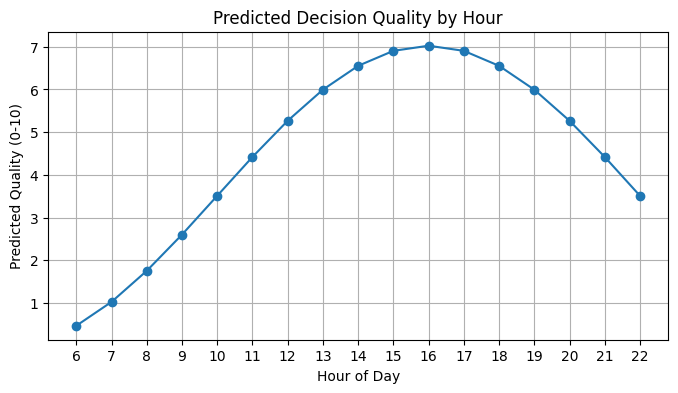


🌟 Best Decision Hour Today: 16:00 (Score: 7.02)
⚠️  Worst Decision Hour Today: 6:00 (Score: 0.47)


In [9]:
import numpy as np
import pandas as pd

# Circadian rhythm simulation (energy fluctuation across the day)
def circadian_energy(hour):
    """Returns a normalized energy score (0-1) based on time of day"""
    # Simple sine wave with peak around 10-11 AM and 7 PM
    return 0.5 + 0.5 * np.sin((hour - 10) * np.pi / 12)

# Last night's sleep input (you can change this each day)
last_night = {
    "sleep_hours": 7.5,
    "sleep_quality": 8.0,
    "dream_intensity": 5.0,
    "caffeine": 0,
    "stress": 4.0,
    "interruptions": 1
}

# Predict baseline decision quality from sleep
base_quality = model.predict(pd.DataFrame([last_night]))[0]

# Generate forecast for each hour of the day
hours = list(range(6, 23))  # from 6 AM to 10 PM
hourly_forecast = []

for h in hours:
    # Adjust quality with circadian rhythm
    adjusted_quality = base_quality * circadian_energy(h)
    hourly_forecast.append((h, adjusted_quality))

# Convert to DataFrame
df_forecast = pd.DataFrame(hourly_forecast, columns=["Hour", "Predicted_Quality"])

print("\n--- Hourly Cognitive Forecast ---")
print(df_forecast.head(10))

# Plot forecast
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
plt.plot(df_forecast["Hour"], df_forecast["Predicted_Quality"], marker="o")
plt.title("Predicted Decision Quality by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Predicted Quality (0-10)")
plt.xticks(hours)
plt.grid(True)
plt.show()

# Best & worst hours
best_hour = df_forecast.loc[df_forecast["Predicted_Quality"].idxmax()]
worst_hour = df_forecast.loc[df_forecast["Predicted_Quality"].idxmin()]

print(f"\n🌟 Best Decision Hour Today: {int(best_hour['Hour'])}:00 "
      f"(Score: {best_hour['Predicted_Quality']:.2f})")
print(f"⚠️  Worst Decision Hour Today: {int(worst_hour['Hour'])}:00 "
      f"(Score: {worst_hour['Predicted_Quality']:.2f})")


Sleep data shape: (1095, 8)
Decisions data shape: (5470, 6)
Merged data shape: (5470, 13)

--- Correlation Matrix ---
                  sleep_quality  sleep_hours  decision_quality  confidence  \
sleep_quality          1.000000     0.019605          0.798465    0.740985   
sleep_hours            0.019605     1.000000          0.016902    0.016179   
decision_quality       0.798465     0.016902          1.000000    0.929930   
confidence             0.740985     0.016179          0.929930    1.000000   
energy                 0.689891     0.012252          0.536696    0.495078   
stress                -0.004548     0.017159         -0.069232   -0.069455   

                    energy    stress  
sleep_quality     0.689891 -0.004548  
sleep_hours       0.012252  0.017159  
decision_quality  0.536696 -0.069232  
confidence        0.495078 -0.069455  
energy            1.000000 -0.008116  
stress           -0.008116  1.000000  

--- Average Decision Quality by Type ---
decision_type
Analyt

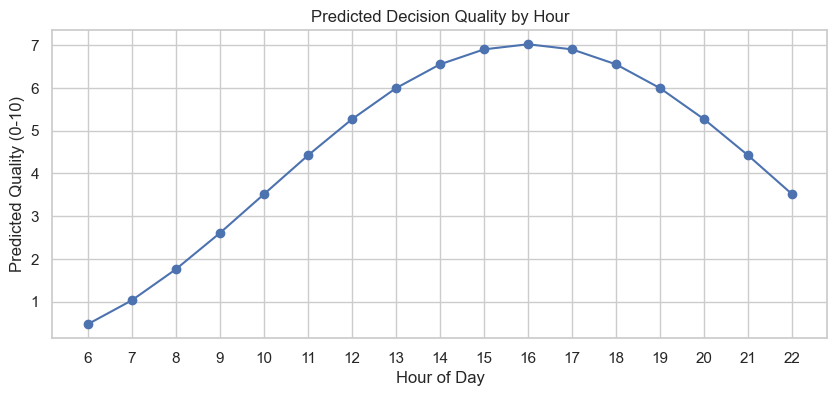


🌟 Best Decision Hour Today: 16:00 (Score: 7.02)
⚠️  Worst Decision Hour Today: 6:00 (Score: 0.47)


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

sns.set(style="whitegrid", rc={"figure.figsize": (8,5)})

# Step 1: Load datasets
df_sleep = pd.read_csv("sleep_records.csv")   # your sleep CSV
df_decisions = pd.read_csv("decision_logs.csv")  # your decision CSV

# Convert date column
df_sleep['date'] = pd.to_datetime(df_sleep['date']).dt.date
df_decisions['date'] = pd.to_datetime(df_decisions['date']).dt.date

print("Sleep data shape:", df_sleep.shape)
print("Decisions data shape:", df_decisions.shape)

# Step 2: Merge datasets
df_merged = pd.merge(df_decisions, df_sleep, on="date", how="left")
print("Merged data shape:", df_merged.shape)

# Step 3: Compute sleep_hours
df_merged["bedtime_dt"] = pd.to_datetime(df_merged["bedtime"], format="%H:%M")
df_merged["waketime_dt"] = pd.to_datetime(df_merged["waketime"], format="%H:%M")
df_merged.loc[df_merged["waketime_dt"] < df_merged["bedtime_dt"], "waketime_dt"] += pd.Timedelta(days=1)
df_merged["sleep_hours"] = (df_merged["waketime_dt"] - df_merged["bedtime_dt"]).dt.total_seconds() / 3600

# Step 4: Basic Analysis
print("\n--- Correlation Matrix ---")
print(df_merged[["sleep_quality", "sleep_hours", "decision_quality", "confidence", "energy", "stress"]].corr())

print("\n--- Average Decision Quality by Type ---")
print(df_merged.groupby("decision_type")["decision_quality"].mean())

# Step 5: Simple ML Model to Predict Decision Quality
features = ["sleep_hours", "sleep_quality", "dream_intensity", "caffeine", "stress", "interruptions"]
X = df_merged[features]
y = df_merged["decision_quality"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("\n--- Model Evaluation ---")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

importance = pd.DataFrame({"Feature": features, "Coefficient": model.coef_})
print("\n--- Feature Importance ---")
print(importance.sort_values(by="Coefficient", ascending=False))

# Step 6: Daily Forecast Example
last_night = {
    "sleep_hours": 7.5,
    "sleep_quality": 8.0,
    "dream_intensity": 5.0,
    "caffeine": 0,
    "stress": 4.0,
    "interruptions": 1
}
base_quality = model.predict(pd.DataFrame([last_night]))[0]
print("\n--- Daily Cognitive Forecast ---")
print(f"Predicted Decision Quality Score: {base_quality:.2f}/10")

# Step 7: Hourly Best Decision Forecast
def circadian_energy(hour):
    return 0.5 + 0.5 * np.sin((hour - 10) * np.pi / 12)

hours = list(range(6,23))
hourly_forecast = [(h, base_quality * circadian_energy(h)) for h in hours]
df_forecast = pd.DataFrame(hourly_forecast, columns=["Hour", "Predicted_Quality"])

# Plot hourly forecast
plt.figure(figsize=(10,4))
plt.plot(df_forecast["Hour"], df_forecast["Predicted_Quality"], marker="o")
plt.title("Predicted Decision Quality by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Predicted Quality (0-10)")
plt.xticks(hours)
plt.grid(True)
plt.show()

# Best & worst hours
best_hour = df_forecast.loc[df_forecast["Predicted_Quality"].idxmax()]
worst_hour = df_forecast.loc[df_forecast["Predicted_Quality"].idxmin()]

print(f"\n🌟 Best Decision Hour Today: {int(best_hour['Hour'])}:00 (Score: {best_hour['Predicted_Quality']:.2f})")
print(f"⚠️  Worst Decision Hour Today: {int(worst_hour['Hour'])}:00 (Score: {worst_hour['Predicted_Quality']:.2f})")



In [11]:
# Step 0: Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import ipywidgets as widgets
from IPython.display import display

sns.set(style="whitegrid", rc={"figure.figsize": (8,5)})

# Step 1: Load datasets
df_sleep = pd.read_csv("sleep_records.csv")
df_decisions = pd.read_csv("decision_logs.csv")
df_sleep['date'] = pd.to_datetime(df_sleep['date']).dt.date
df_decisions['date'] = pd.to_datetime(df_decisions['date']).dt.date
df_merged = pd.merge(df_decisions, df_sleep, on="date", how="left")

# Compute sleep_hours
df_merged["bedtime_dt"] = pd.to_datetime(df_merged["bedtime"], format="%H:%M")
df_merged["waketime_dt"] = pd.to_datetime(df_merged["waketime"], format="%H:%M")
df_merged.loc[df_merged["waketime_dt"] < df_merged["bedtime_dt"], "waketime_dt"] += pd.Timedelta(days=1)
df_merged["sleep_hours"] = (df_merged["waketime_dt"] - df_merged["bedtime_dt"]).dt.total_seconds() / 3600

# Train ML Model
features = ["sleep_hours", "sleep_quality", "dream_intensity", "caffeine", "stress", "interruptions"]
X = df_merged[features]
y = df_merged["decision_quality"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

# ----------------------------
# Step 2: Interactive Input Widgets
sleep_hours = widgets.FloatSlider(min=4, max=10, step=0.1, value=7.5, description="Sleep Hours")
sleep_quality = widgets.FloatSlider(min=1, max=10, step=0.1, value=8.0, description="Sleep Quality")
dream_intensity = widgets.FloatSlider(min=1, max=10, step=0.1, value=5.0, description="Dream Intensity")
caffeine = widgets.Dropdown(options=[0,1], value=0, description="Caffeine")
stress = widgets.FloatSlider(min=1, max=10, step=0.1, value=4.0, description="Stress")
interruptions = widgets.IntSlider(min=0, max=5, step=1, value=1, description="Interruptions")

input_widgets = widgets.VBox([sleep_hours, sleep_quality, dream_intensity, caffeine, stress, interruptions])
display(input_widgets)

# ----------------------------
# Step 3: Prediction + Forecast Function
def forecast_decision_quality(sleep_hours, sleep_quality, dream_intensity, caffeine, stress, interruptions):
    last_night = {
        "sleep_hours": sleep_hours,
        "sleep_quality": sleep_quality,
        "dream_intensity": dream_intensity,
        "caffeine": caffeine,
        "stress": stress,
        "interruptions": interruptions
    }
    
    base_quality = model.predict(pd.DataFrame([last_night]))[0]
    print(f"\n--- Predicted Decision Quality: {base_quality:.2f}/10 ---")
    
    # Hourly forecast
    def circadian_energy(hour):
        return 0.5 + 0.5 * np.sin((hour - 10) * np.pi / 12)
    
    hours = list(range(6,23))
    hourly_forecast = [(h, base_quality * circadian_energy(h)) for h in hours]
    df_forecast = pd.DataFrame(hourly_forecast, columns=["Hour", "Predicted_Quality"])
    
    # Plot
    plt.figure(figsize=(10,4))
    plt.plot(df_forecast["Hour"], df_forecast["Predicted_Quality"], marker="o")
    plt.title("Predicted Decision Quality by Hour")
    plt.xlabel("Hour of Day")
    plt.ylabel("Predicted Quality (0-10)")
    plt.xticks(hours)
    plt.grid(True)
    plt.show()
    
    best_hour = df_forecast.loc[df_forecast["Predicted_Quality"].idxmax()]
    worst_hour = df_forecast.loc[df_forecast["Predicted_Quality"].idxmin()]
    
    print(f"🌟 Best Decision Hour Today: {int(best_hour['Hour'])}:00 (Score: {best_hour['Predicted_Quality']:.2f})")
    print(f"⚠️ Worst Decision Hour Today: {int(worst_hour['Hour'])}:00 (Score: {worst_hour['Predicted_Quality']:.2f})")

# ----------------------------
# Step 4: Link widgets to function
widgets.interactive(
    forecast_decision_quality,
    sleep_hours=sleep_hours,
    sleep_quality=sleep_quality,
    dream_intensity=dream_intensity,
    caffeine=caffeine,
    stress=stress,
    interruptions=interruptions
)


interactive(children=(FloatSlider(value=7.5, description='Sleep Hours', max=10.0, min=4.0), FloatSlider(value=…

In [12]:
# Function to give suggestions
def forecast_with_suggestions(sleep_hours, sleep_quality, dream_intensity, caffeine, stress, interruptions):
    last_night = {
        "sleep_hours": sleep_hours,
        "sleep_quality": sleep_quality,
        "dream_intensity": dream_intensity,
        "caffeine": caffeine,
        "stress": stress,
        "interruptions": interruptions
    }
    
    base_quality = model.predict(pd.DataFrame([last_night]))[0]
    print(f"\n--- Predicted Decision Quality: {base_quality:.2f}/10 ---")
    
    # Hourly forecast
    def circadian_energy(hour):
        return 0.5 + 0.5 * np.sin((hour - 10) * np.pi / 12)
    
    hours = list(range(6,23))
    hourly_forecast = [(h, base_quality * circadian_energy(h)) for h in hours]
    df_forecast = pd.DataFrame(hourly_forecast, columns=["Hour", "Predicted_Quality"])
    
    # Plot
    plt.figure(figsize=(10,4))
    plt.plot(df_forecast["Hour"], df_forecast["Predicted_Quality"], marker="o")
    plt.title("Predicted Decision Quality by Hour")
    plt.xlabel("Hour of Day")
    plt.ylabel("Predicted Quality (0-10)")
    plt.xticks(hours)
    plt.grid(True)
    plt.show()
    
    # Best and worst hour
    best_hour = df_forecast.loc[df_forecast["Predicted_Quality"].idxmax()]
    worst_hour = df_forecast.loc[df_forecast["Predicted_Quality"].idxmin()]
    print(f"🌟 Best Decision Hour Today: {int(best_hour['Hour'])}:00 (Score: {best_hour['Predicted_Quality']:.2f})")
    print(f"⚠️ Worst Decision Hour Today: {int(worst_hour['Hour'])}:00 (Score: {worst_hour['Predicted_Quality']:.2f})")
    
    # Decision type suggestions
    print("\n--- Suggested Decision Timing ---")
    for index, row in df_forecast.iterrows():
        hour = int(row["Hour"])
        quality = row["Predicted_Quality"]
        if quality >= 7:
            print(f"{hour}:00 → ✅ Analytical / Financial / Important Decisions")
        elif 5 <= quality < 7:
            print(f"{hour}:00 → ⚡ Creative / Innovative Work")
        else:
            print(f"{hour}:00 → 💤 Routine / Social / Low-Stakes Tasks")

# Make it interactive
widgets.interactive(
    forecast_with_suggestions,
    sleep_hours=sleep_hours,
    sleep_quality=sleep_quality,
    dream_intensity=dream_intensity,
    caffeine=caffeine,
    stress=stress,
    interruptions=interruptions
)


interactive(children=(FloatSlider(value=9.1, description='Sleep Hours', max=10.0, min=4.0), FloatSlider(value=…

In [13]:
def circadian_energy(hour):
    return 0.5 + 0.5 * np.sin((hour - 10) * np.pi / 12)

In [14]:
def circadian_energy(hour):
    """
    More realistic daily energy cycle:
    - Morning peak ~10-11 AM
    - Afternoon dip ~2-3 PM
    - Evening minor peak ~7-8 PM
    Output normalized 0-1
    """
    morning_peak = np.exp(-0.5*((hour-10)/2)**2)     # morning Gaussian
    evening_peak = 0.6 * np.exp(-0.5*((hour-19)/2)**2) # evening Gaussian
    energy = morning_peak + evening_peak
    # normalize to 0-1
    energy = (energy - energy.min()) / (energy.max() - energy.min())
    return energy


In [15]:
def circadian_energy(hour):
    """
    Realistic daily energy cycle:
    - Morning peak ~10-11 AM
    - Evening minor peak ~19:00
    Returns a value between 0.0 and 1.0
    """
    morning_peak = np.exp(-0.5*((hour-10)/2)**2)
    evening_peak = 0.6 * np.exp(-0.5*((hour-19)/2)**2)
    energy_raw = morning_peak + evening_peak
    
    # Normalize safely
    min_val = energy_raw
    max_val = energy_raw
    # Check for zero range
    if max_val - min_val == 0:
        return 1.0  # default to full energy if constant
    energy_norm = (energy_raw - min_val) / (max_val - min_val)
    
    return float(energy_norm)


In [16]:
hours = np.arange(6, 23)  # 6 AM to 10 PM
morning_peak = np.exp(-0.5*((hours-10)/2)**2)
evening_peak = 0.6 * np.exp(-0.5*((hours-19)/2)**2)
energy_raw = morning_peak + evening_peak
# Normalize 0-1
energy_norm = (energy_raw - energy_raw.min()) / (energy_raw.max() - energy_raw.min())
# Apply base_quality
predicted_quality_by_hour = energy_norm * base_quality

df_forecast = pd.DataFrame({
    "Hour": hours,
    "Predicted_Quality": predicted_quality_by_hour
})

best_hour = df_forecast.loc[df_forecast["Predicted_Quality"].idxmax()]
worst_hour = df_forecast.loc[df_forecast["Predicted_Quality"].idxmin()]

print(f"🌟 Best Decision Hour Today: {int(best_hour['Hour'])}:00 (Score: {best_hour['Predicted_Quality']:.2f})")
print(f"⚠️ Worst Decision Hour Today: {int(worst_hour['Hour'])}:00 (Score: {worst_hour['Predicted_Quality']:.2f})")


🌟 Best Decision Hour Today: 10:00 (Score: 7.02)
⚠️ Worst Decision Hour Today: 15:00 (Score: 0.00)


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import ipywidgets as widgets
from IPython.display import display

sns.set(style="whitegrid", rc={"figure.figsize": (8,5)})

# Step 1: Load datasets
df_sleep = pd.read_csv("sleep_records.csv")       # replace with your file
df_decisions = pd.read_csv("decision_logs.csv")   # replace with your file

df_sleep['date'] = pd.to_datetime(df_sleep['date']).dt.date
df_decisions['date'] = pd.to_datetime(df_decisions['date']).dt.date
df_merged = pd.merge(df_decisions, df_sleep, on="date", how="left")

# Compute sleep_hours
df_merged["bedtime_dt"] = pd.to_datetime(df_merged["bedtime"], format="%H:%M")
df_merged["waketime_dt"] = pd.to_datetime(df_merged["waketime"], format="%H:%M")
df_merged.loc[df_merged["waketime_dt"] < df_merged["bedtime_dt"], "waketime_dt"] += pd.Timedelta(days=1)
df_merged["sleep_hours"] = (df_merged["waketime_dt"] - df_merged["bedtime_dt"]).dt.total_seconds() / 3600

# Train ML Model
features = ["sleep_hours", "sleep_quality", "dream_intensity", "caffeine", "stress", "interruptions"]
X = df_merged[features]
y = df_merged["decision_quality"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

# ----------------------------
# Step 2: Interactive Input Widgets
sleep_hours_slider = widgets.FloatSlider(min=4, max=10, step=0.1, value=7.5, description="Sleep Hours")
sleep_quality_slider = widgets.FloatSlider(min=1, max=10, step=0.1, value=8.0, description="Sleep Quality")
dream_intensity_slider = widgets.FloatSlider(min=1, max=10, step=0.1, value=5.0, description="Dream Intensity")
caffeine_dropdown = widgets.Dropdown(options=[0,1], value=0, description="Caffeine")
stress_slider = widgets.FloatSlider(min=1, max=10, step=0.1, value=4.0, description="Stress")
interruptions_slider = widgets.IntSlider(min=0, max=5, step=1, value=1, description="Interruptions")

input_widgets = widgets.VBox([sleep_hours_slider, sleep_quality_slider,
                              dream_intensity_slider, caffeine_dropdown,
                              stress_slider, interruptions_slider])
display(input_widgets)

# ----------------------------
# Step 3: Forecast Function
def forecast_with_suggestions(sleep_hours, sleep_quality, dream_intensity, caffeine, stress, interruptions):
    last_night = {
        "sleep_hours": sleep_hours,
        "sleep_quality": sleep_quality,
        "dream_intensity": dream_intensity,
        "caffeine": caffeine,
        "stress": stress,
        "interruptions": interruptions
    }
    
    # Base predicted decision quality
    base_quality = model.predict(pd.DataFrame([last_night]))[0]
    print(f"\n--- Predicted Decision Quality: {base_quality:.2f}/10 ---")
    
    # Step 3a: Hourly circadian forecast
    hours = np.arange(6,23)  # 6 AM to 10 PM
    morning_peak = np.exp(-0.5*((hours-10)/2)**2)
    evening_peak = 0.6 * np.exp(-0.5*((hours-19)/2)**2)
    energy_raw = morning_peak + evening_peak
    energy_norm = (energy_raw - energy_raw.min()) / (energy_raw.max() - energy_raw.min())
    
    predicted_quality_by_hour = energy_norm * base_quality
    df_forecast = pd.DataFrame({
        "Hour": hours,
        "Predicted_Quality": predicted_quality_by_hour
    })
    
    # Plot hourly forecast
    plt.figure(figsize=(10,4))
    plt.plot(df_forecast["Hour"], df_forecast["Predicted_Quality"], marker="o")
    plt.title("Predicted Decision Quality by Hour")
    plt.xlabel("Hour of Day")
    plt.ylabel("Predicted Quality (0-10)")
    plt.xticks(hours)
    plt.grid(True)
    plt.show()
    
    # Best and worst hour
    best_hour = df_forecast.loc[df_forecast["Predicted_Quality"].idxmax()]
    worst_hour = df_forecast.loc[df_forecast["Predicted_Quality"].idxmin()]
    print(f"🌟 Best Decision Hour Today: {int(best_hour['Hour'])}:00 (Score: {best_hour['Predicted_Quality']:.2f})")
    print(f"⚠️ Worst Decision Hour Today: {int(worst_hour['Hour'])}:00 (Score: {worst_hour['Predicted_Quality']:.2f})")
    
    # Step 3b: Decision type suggestions
    print("\n--- Suggested Decision Timing ---")
    for idx, row in df_forecast.iterrows():
        hour = int(row["Hour"])
        quality = row["Predicted_Quality"]
        if quality >= 7:
            print(f"{hour}:00 → ✅ Analytical / Financial / Important Decisions")
        elif 5 <= quality < 7:
            print(f"{hour}:00 → ⚡ Creative / Innovative Work")
        else:
            print(f"{hour}:00 → 💤 Routine / Social / Low-Stakes Tasks")

# ----------------------------
# Step 4: Interactive link
widgets.interactive(
    forecast_with_suggestions,
    sleep_hours=sleep_hours_slider,
    sleep_quality=sleep_quality_slider,
    dream_intensity=dream_intensity_slider,
    caffeine=caffeine_dropdown,
    stress=stress_slider,
    interruptions=interruptions_slider
)


interactive(children=(FloatSlider(value=7.5, description='Sleep Hours', max=10.0, min=4.0), FloatSlider(value=…

In [18]:
import os
from datetime import date

def save_daily_report(sleep_hours, sleep_quality, dream_intensity, caffeine, stress, interruptions):
    last_night = {
        "sleep_hours": sleep_hours,
        "sleep_quality": sleep_quality,
        "dream_intensity": dream_intensity,
        "caffeine": caffeine,
        "stress": stress,
        "interruptions": interruptions
    }

    # Base predicted quality
    base_quality = model.predict(pd.DataFrame([last_night]))[0]

    # Hourly forecast
    hours = np.arange(6,23)
    morning_peak = np.exp(-0.5*((hours-10)/2)**2)
    evening_peak = 0.6 * np.exp(-0.5*((hours-19)/2)**2)
    energy_raw = morning_peak + evening_peak
    energy_norm = (energy_raw - energy_raw.min()) / (energy_raw.max() - energy_raw.min())
    predicted_quality_by_hour = energy_norm * base_quality

    # Best/worst hours
    best_hour = hours[np.argmax(predicted_quality_by_hour)]
    worst_hour = hours[np.argmin(predicted_quality_by_hour)]

    # Create DataFrame for this day's log
    df_day = pd.DataFrame({
        "date": [date.today()]*len(hours),
        "hour": hours,
        "predicted_quality": predicted_quality_by_hour,
        "best_hour": [best_hour]*len(hours),
        "worst_hour": [worst_hour]*len(hours),
        "sleep_hours": [sleep_hours]*len(hours),
        "sleep_quality": [sleep_quality]*len(hours),
        "dream_intensity": [dream_intensity]*len(hours),
        "caffeine": [caffeine]*len(hours),
        "stress": [stress]*len(hours),
        "interruptions": [interruptions]*len(hours)
    })

    # Save or append to CSV
    filename = "daily_forecast_log.csv"
    if os.path.exists(filename):
        df_day.to_csv(filename, mode='a', index=False, header=False)
    else:
        df_day.to_csv(filename, index=False)
    
    print(f"✅ Daily forecast saved to '{filename}'")


In [19]:
save_button = widgets.Button(description="Save Daily Report", button_style="success")

def on_save_clicked(b):
    save_daily_report(
        sleep_hours_slider.value,
        sleep_quality_slider.value,
        dream_intensity_slider.value,
        caffeine_dropdown.value,
        stress_slider.value,
        interruptions_slider.value
    )

save_button.on_click(on_save_clicked)
display(save_button)


Button(button_style='success', description='Save Daily Report', style=ButtonStyle())

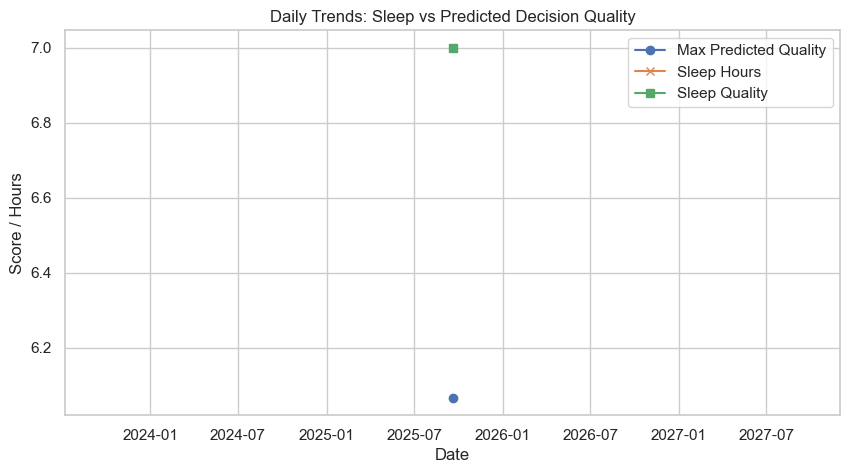

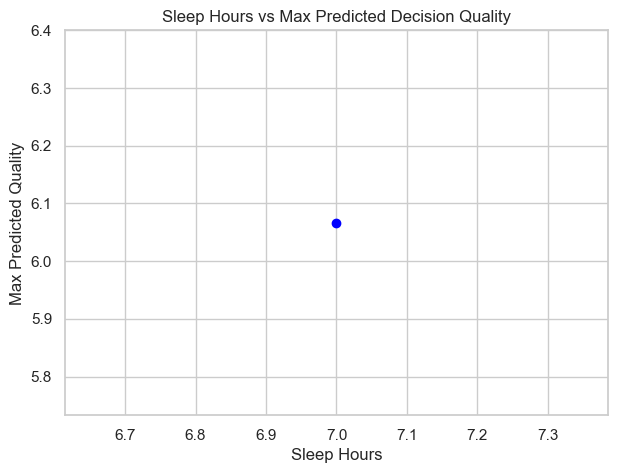

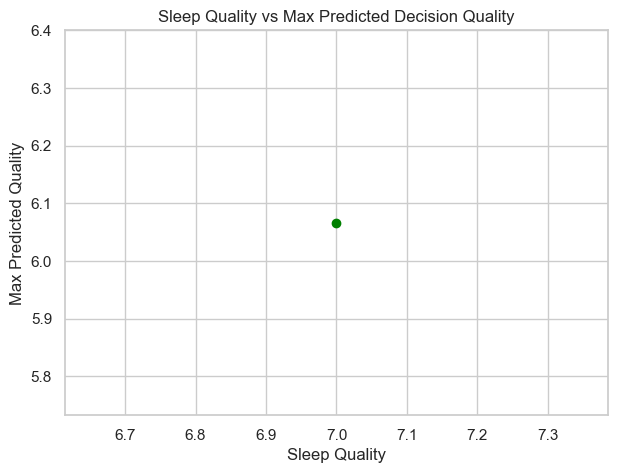

In [20]:
# Step 7a: Load the daily log
log_file = "daily_forecast_log.csv"
if os.path.exists(log_file):
    df_log = pd.read_csv(log_file)
    df_log['date'] = pd.to_datetime(df_log['date'])
else:
    print("No log file found. Save a daily report first.")
    df_log = None

# Step 7b: Plot sleep vs best predicted quality
if df_log is not None:
    # Aggregate daily best predicted quality
    daily_summary = df_log.groupby('date').agg({
        'predicted_quality': 'max',
        'sleep_hours': 'mean',
        'sleep_quality': 'mean'
    }).reset_index()

    plt.figure(figsize=(10,5))
    plt.plot(daily_summary['date'], daily_summary['predicted_quality'], marker='o', label='Max Predicted Quality')
    plt.plot(daily_summary['date'], daily_summary['sleep_hours'], marker='x', label='Sleep Hours')
    plt.plot(daily_summary['date'], daily_summary['sleep_quality'], marker='s', label='Sleep Quality')
    plt.title("Daily Trends: Sleep vs Predicted Decision Quality")
    plt.xlabel("Date")
    plt.ylabel("Score / Hours")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Optional: Scatter plot of sleep_hours vs predicted_quality
    plt.figure(figsize=(7,5))
    plt.scatter(daily_summary['sleep_hours'], daily_summary['predicted_quality'], c='blue')
    plt.title("Sleep Hours vs Max Predicted Decision Quality")
    plt.xlabel("Sleep Hours")
    plt.ylabel("Max Predicted Quality")
    plt.grid(True)
    plt.show()

    # Optional: Scatter plot of sleep_quality vs predicted_quality
    plt.figure(figsize=(7,5))
    plt.scatter(daily_summary['sleep_quality'], daily_summary['predicted_quality'], c='green')
    plt.title("Sleep Quality vs Max Predicted Decision Quality")
    plt.xlabel("Sleep Quality")
    plt.ylabel("Max Predicted Quality")
    plt.grid(True)
    plt.show()


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import ipywidgets as widgets
from IPython.display import display
import os
from datetime import date

sns.set(style="whitegrid", rc={"figure.figsize": (8,5)})

# Step 1: Load datasets
df_sleep = pd.read_csv("sleep_records.csv")       # replace with your file
df_decisions = pd.read_csv("decision_logs.csv")   # replace with your file

df_sleep['date'] = pd.to_datetime(df_sleep['date']).dt.date
df_decisions['date'] = pd.to_datetime(df_decisions['date']).dt.date
df_merged = pd.merge(df_decisions, df_sleep, on="date", how="left")

# Compute sleep_hours
df_merged["bedtime_dt"] = pd.to_datetime(df_merged["bedtime"], format="%H:%M")
df_merged["waketime_dt"] = pd.to_datetime(df_merged["waketime"], format="%H:%M")
df_merged.loc[df_merged["waketime_dt"] < df_merged["bedtime_dt"], "waketime_dt"] += pd.Timedelta(days=1)
df_merged["sleep_hours"] = (df_merged["waketime_dt"] - df_merged["bedtime_dt"]).dt.total_seconds() / 3600

# Train ML Model
features = ["sleep_hours", "sleep_quality", "dream_intensity", "caffeine", "stress", "interruptions"]
X = df_merged[features]
y = df_merged["decision_quality"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

# ----------------------------
# Step 2: Interactive Input Widgets
sleep_hours_slider = widgets.FloatSlider(min=4, max=10, step=0.1, value=7.5, description="Sleep Hours")
sleep_quality_slider = widgets.FloatSlider(min=1, max=10, step=0.1, value=8.0, description="Sleep Quality")
dream_intensity_slider = widgets.FloatSlider(min=1, max=10, step=0.1, value=5.0, description="Dream Intensity")
caffeine_dropdown = widgets.Dropdown(options=[0,1], value=0, description="Caffeine")
stress_slider = widgets.FloatSlider(min=1, max=10, step=0.1, value=4.0, description="Stress")
interruptions_slider = widgets.IntSlider(min=0, max=5, step=1, value=1, description="Interruptions")

input_widgets = widgets.VBox([sleep_hours_slider, sleep_quality_slider,
                              dream_intensity_slider, caffeine_dropdown,
                              stress_slider, interruptions_slider])
display(input_widgets)

# ----------------------------
# Step 3: Forecast + Suggestions Function
def forecast_and_save(sleep_hours, sleep_quality, dream_intensity, caffeine, stress, interruptions):
    last_night = {
        "sleep_hours": sleep_hours,
        "sleep_quality": sleep_quality,
        "dream_intensity": dream_intensity,
        "caffeine": caffeine,
        "stress": stress,
        "interruptions": interruptions
    }

    # Base predicted decision quality
    base_quality = model.predict(pd.DataFrame([last_night]))[0]
    print(f"\n--- Predicted Decision Quality: {base_quality:.2f}/10 ---")
    
    # Hourly forecast
    hours = np.arange(6,23)
    morning_peak = np.exp(-0.5*((hours-10)/2)**2)
    evening_peak = 0.6 * np.exp(-0.5*((hours-19)/2)**2)
    energy_raw = morning_peak + evening_peak
    energy_norm = (energy_raw - energy_raw.min()) / (energy_raw.max() - energy_raw.min())
    predicted_quality_by_hour = energy_norm * base_quality
    df_forecast = pd.DataFrame({
        "Hour": hours,
        "Predicted_Quality": predicted_quality_by_hour
    })
    
    # Plot forecast
    plt.figure(figsize=(10,4))
    plt.plot(df_forecast["Hour"], df_forecast["Predicted_Quality"], marker="o")
    plt.title("Predicted Decision Quality by Hour")
    plt.xlabel("Hour of Day")
    plt.ylabel("Predicted Quality (0-10)")
    plt.xticks(hours)
    plt.grid(True)
    plt.show()
    
    # Best / worst hours
    best_hour = df_forecast.loc[df_forecast["Predicted_Quality"].idxmax()]
    worst_hour = df_forecast.loc[df_forecast["Predicted_Quality"].idxmin()]
    print(f"🌟 Best Decision Hour Today: {int(best_hour['Hour'])}:00 (Score: {best_hour['Predicted_Quality']:.2f})")
    print(f"⚠️ Worst Decision Hour Today: {int(worst_hour['Hour'])}:00 (Score: {worst_hour['Predicted_Quality']:.2f})")
    
    # Decision type suggestions
    print("\n--- Suggested Decision Timing ---")
    for idx, row in df_forecast.iterrows():
        hour = int(row["Hour"])
        quality = row["Predicted_Quality"]
        if quality >= 7:
            print(f"{hour}:00 → ✅ Analytical / Financial / Important Decisions")
        elif 5 <= quality < 7:
            print(f"{hour}:00 → ⚡ Creative / Innovative Work")
        else:
            print(f"{hour}:00 → 💤 Routine / Social / Low-Stakes Tasks")
    
    # Save daily report
    filename = "daily_forecast_log.csv"
    df_day = pd.DataFrame({
        "date": [date.today()]*len(hours),
        "hour": hours,
        "predicted_quality": predicted_quality_by_hour,
        "best_hour": [int(best_hour['Hour'])]*len(hours),
        "worst_hour": [int(worst_hour['Hour'])]*len(hours),
        "sleep_hours": [sleep_hours]*len(hours),
        "sleep_quality": [sleep_quality]*len(hours),
        "dream_intensity": [dream_intensity]*len(hours),
        "caffeine": [caffeine]*len(hours),
        "stress": [stress]*len(hours),
        "interruptions": [interruptions]*len(hours)
    })
    if os.path.exists(filename):
        df_day.to_csv(filename, mode='a', index=False, header=False)
    else:
        df_day.to_csv(filename, index=False)
    print(f"✅ Daily forecast saved to '{filename}'")
    
    # Trend plots
    df_log = pd.read_csv(filename)
    df_log['date'] = pd.to_datetime(df_log['date'])
    daily_summary = df_log.groupby('date').agg({
        'predicted_quality': 'max',
        'sleep_hours': 'mean',
        'sleep_quality': 'mean'
    }).reset_index()

    plt.figure(figsize=(10,5))
    plt.plot(daily_summary['date'], daily_summary['predicted_quality'], marker='o', label='Max Predicted Quality')
    plt.plot(daily_summary['date'], daily_summary['sleep_hours'], marker='x', label='Sleep Hours')
    plt.plot(daily_summary['date'], daily_summary['sleep_quality'], marker='s', label='Sleep Quality')
    plt.title("Daily Trends: Sleep vs Predicted Decision Quality")
    plt.xlabel("Date")
    plt.ylabel("Score / Hours")
    plt.legend()
    plt.grid(True)
    plt.show()

# ----------------------------
# Step 4: Interactive Button
interactive_forecast = widgets.interactive(
    forecast_and_save,
    sleep_hours=sleep_hours_slider,
    sleep_quality=sleep_quality_slider,
    dream_intensity=dream_intensity_slider,
    caffeine=caffeine_dropdown,
    stress=stress_slider,
    interruptions=interruptions_slider
)
display(interactive_forecast)


interactive(children=(FloatSlider(value=7.5, description='Sleep Hours', max=10.0, min=4.0), FloatSlider(value=…

In [22]:
q_min = df_forecast["Predicted_Quality"].min()
q_max = df_forecast["Predicted_Quality"].max()
q_range = q_max - q_min if q_max - q_min != 0 else 1  # avoid divide by zero

for idx, row in df_forecast.iterrows():
    hour = int(row["Hour"])
    quality = row["Predicted_Quality"]
    
    # Dynamic thresholds
    if quality >= q_min + 0.66*q_range:
        print(f"{hour}:00 → ✅ Analytical / Financial / Important Decisions")
    elif quality >= q_min + 0.33*q_range:
        print(f"{hour}:00 → ⚡ Creative / Innovative Work")
    else:
        print(f"{hour}:00 → 💤 Routine / Social / Low-Stakes Tasks")


6:00 → 💤 Routine / Social / Low-Stakes Tasks
7:00 → 💤 Routine / Social / Low-Stakes Tasks
8:00 → ⚡ Creative / Innovative Work
9:00 → ✅ Analytical / Financial / Important Decisions
10:00 → ✅ Analytical / Financial / Important Decisions
11:00 → ✅ Analytical / Financial / Important Decisions
12:00 → ⚡ Creative / Innovative Work
13:00 → 💤 Routine / Social / Low-Stakes Tasks
14:00 → 💤 Routine / Social / Low-Stakes Tasks
15:00 → 💤 Routine / Social / Low-Stakes Tasks
16:00 → 💤 Routine / Social / Low-Stakes Tasks
17:00 → 💤 Routine / Social / Low-Stakes Tasks
18:00 → ⚡ Creative / Innovative Work
19:00 → ⚡ Creative / Innovative Work
20:00 → ⚡ Creative / Innovative Work
21:00 → 💤 Routine / Social / Low-Stakes Tasks
22:00 → 💤 Routine / Social / Low-Stakes Tasks


In [23]:
q_min = df_forecast["Predicted_Quality"].min()
q_max = df_forecast["Predicted_Quality"].max()
q_range = q_max - q_min if q_max - q_min != 0 else 1  # avoid divide by zero


In [24]:
for idx, row in df_forecast.iterrows():
    hour = int(row["Hour"])
    quality = row["Predicted_Quality"]
    
    if quality >= q_min + 0.66*q_range:
        print(f"{hour}:00 → ✅ Analytical / Financial / Important Decisions")
    elif quality >= q_min + 0.33*q_range:
        print(f"{hour}:00 → ⚡ Creative / Innovative Work")
    else:
        print(f"{hour}:00 → 💤 Routine / Social / Low-Stakes Tasks")


6:00 → 💤 Routine / Social / Low-Stakes Tasks
7:00 → 💤 Routine / Social / Low-Stakes Tasks
8:00 → ⚡ Creative / Innovative Work
9:00 → ✅ Analytical / Financial / Important Decisions
10:00 → ✅ Analytical / Financial / Important Decisions
11:00 → ✅ Analytical / Financial / Important Decisions
12:00 → ⚡ Creative / Innovative Work
13:00 → 💤 Routine / Social / Low-Stakes Tasks
14:00 → 💤 Routine / Social / Low-Stakes Tasks
15:00 → 💤 Routine / Social / Low-Stakes Tasks
16:00 → 💤 Routine / Social / Low-Stakes Tasks
17:00 → 💤 Routine / Social / Low-Stakes Tasks
18:00 → ⚡ Creative / Innovative Work
19:00 → ⚡ Creative / Innovative Work
20:00 → ⚡ Creative / Innovative Work
21:00 → 💤 Routine / Social / Low-Stakes Tasks
22:00 → 💤 Routine / Social / Low-Stakes Tasks


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import ipywidgets as widgets
from IPython.display import display
import os
from datetime import date

sns.set(style="whitegrid", rc={"figure.figsize": (8,5)})

# Step 1: Load datasets
df_sleep = pd.read_csv("sleep_records.csv")       # replace with your file
df_decisions = pd.read_csv("decision_logs.csv")   # replace with your file

df_sleep['date'] = pd.to_datetime(df_sleep['date']).dt.date
df_decisions['date'] = pd.to_datetime(df_decisions['date']).dt.date
df_merged = pd.merge(df_decisions, df_sleep, on="date", how="left")

# Compute sleep_hours
df_merged["bedtime_dt"] = pd.to_datetime(df_merged["bedtime"], format="%H:%M")
df_merged["waketime_dt"] = pd.to_datetime(df_merged["waketime"], format="%H:%M")
df_merged.loc[df_merged["waketime_dt"] < df_merged["bedtime_dt"], "waketime_dt"] += pd.Timedelta(days=1)
df_merged["sleep_hours"] = (df_merged["waketime_dt"] - df_merged["bedtime_dt"]).dt.total_seconds() / 3600

# Train ML Model
features = ["sleep_hours", "sleep_quality", "dream_intensity", "caffeine", "stress", "interruptions"]
X = df_merged[features]
y = df_merged["decision_quality"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

# ----------------------------
# Step 2: Interactive Input Widgets
sleep_hours_slider = widgets.FloatSlider(min=4, max=10, step=0.1, value=7.5, description="Sleep Hours")
sleep_quality_slider = widgets.FloatSlider(min=1, max=10, step=0.1, value=8.0, description="Sleep Quality")
dream_intensity_slider = widgets.FloatSlider(min=1, max=10, step=0.1, value=5.0, description="Dream Intensity")
caffeine_dropdown = widgets.Dropdown(options=[0,1], value=0, description="Caffeine")
stress_slider = widgets.FloatSlider(min=1, max=10, step=0.1, value=4.0, description="Stress")
interruptions_slider = widgets.IntSlider(min=0, max=5, step=1, value=1, description="Interruptions")

input_widgets = widgets.VBox([sleep_hours_slider, sleep_quality_slider,
                              dream_intensity_slider, caffeine_dropdown,
                              stress_slider, interruptions_slider])
display(input_widgets)

# ----------------------------
# Step 3: Forecast + Dynamic Suggestions Function
def forecast_and_save_dynamic(sleep_hours, sleep_quality, dream_intensity, caffeine, stress, interruptions):
    last_night = {
        "sleep_hours": sleep_hours,
        "sleep_quality": sleep_quality,
        "dream_intensity": dream_intensity,
        "caffeine": caffeine,
        "stress": stress,
        "interruptions": interruptions
    }

    # Base predicted decision quality
    base_quality = model.predict(pd.DataFrame([last_night]))[0]
    base_quality = max(0, min(base_quality, 10))  # scale to 0-10
    print(f"\n--- Predicted Decision Quality: {base_quality:.2f}/10 ---")
    
    # Hourly forecast
    hours = np.arange(6,23)
    morning_peak = np.exp(-0.5*((hours-10)/2)**2)
    evening_peak = 0.6 * np.exp(-0.5*((hours-19)/2)**2)
    energy_raw = morning_peak + evening_peak
    energy_norm = (energy_raw - energy_raw.min()) / (energy_raw.max() - energy_raw.min())
    predicted_quality_by_hour = energy_norm * base_quality
    df_forecast = pd.DataFrame({
        "Hour": hours,
        "Predicted_Quality": predicted_quality_by_hour
    })
    
    # Plot forecast
    plt.figure(figsize=(10,4))
    plt.plot(df_forecast["Hour"], df_forecast["Predicted_Quality"], marker="o")
    plt.title("Predicted Decision Quality by Hour")
    plt.xlabel("Hour of Day")
    plt.ylabel("Predicted Quality (0-10)")
    plt.xticks(hours)
    plt.grid(True)
    plt.show()
    
    # Best / worst hours
    best_hour = df_forecast.loc[df_forecast["Predicted_Quality"].idxmax()]
    worst_hour = df_forecast.loc[df_forecast["Predicted_Quality"].idxmin()]
    print(f"🌟 Best Decision Hour Today: {int(best_hour['Hour'])}:00 (Score: {best_hour['Predicted_Quality']:.2f})")
    print(f"⚠️ Worst Decision Hour Today: {int(worst_hour['Hour'])}:00 (Score: {worst_hour['Predicted_Quality']:.2f})")
    
    # Dynamic Decision Type Suggestions
    q_min = df_forecast["Predicted_Quality"].min()
    q_max = df_forecast["Predicted_Quality"].max()
    q_range = q_max - q_min if q_max - q_min != 0 else 1  # avoid divide by zero

    print("\n--- Suggested Decision Timing ---")
    for idx, row in df_forecast.iterrows():
        hour = int(row["Hour"])
        quality = row["Predicted_Quality"]
        if quality >= q_min + 0.66*q_range:
            print(f"{hour}:00 → ✅ Analytical / Financial / Important Decisions")
        elif quality >= q_min + 0.33*q_range:
            print(f"{hour}:00 → ⚡ Creative / Innovative Work")
        else:
            print(f"{hour}:00 → 💤 Routine / Social / Low-Stakes Tasks")
    
    # Save daily report
    filename = "daily_forecast_log.csv"
    df_day = pd.DataFrame({
        "date": [date.today()]*len(hours),
        "hour": hours,
        "predicted_quality": predicted_quality_by_hour,
        "best_hour": [int(best_hour['Hour'])]*len(hours),
        "worst_hour": [int(worst_hour['Hour'])]*len(hours),
        "sleep_hours": [sleep_hours]*len(hours),
        "sleep_quality": [sleep_quality]*len(hours),
        "dream_intensity": [dream_intensity]*len(hours),
        "caffeine": [caffeine]*len(hours),
        "stress": [stress]*len(hours),
        "interruptions": [interruptions]*len(hours)
    })
    if os.path.exists(filename):
        df_day.to_csv(filename, mode='a', index=False, header=False)
    else:
        df_day.to_csv(filename, index=False)
    print(f"✅ Daily forecast saved to '{filename}'")
    
    # Trend plots
    df_log = pd.read_csv(filename)
    df_log['date'] = pd.to_datetime(df_log['date'])
    daily_summary = df_log.groupby('date').agg({
        'predicted_quality': 'max',
        'sleep_hours': 'mean',
        'sleep_quality': 'mean'
    }).reset_index()

    plt.figure(figsize=(10,5))
    plt.plot(daily_summary['date'], daily_summary['predicted_quality'], marker='o', label='Max Predicted Quality')
    plt.plot(daily_summary['date'], daily_summary['sleep_hours'], marker='x', label='Sleep Hours')
    plt.plot(daily_summary['date'], daily_summary['sleep_quality'], marker='s', label='Sleep Quality')
    plt.title("Daily Trends: Sleep vs Predicted Decision Quality")
    plt.xlabel("Date")
    plt.ylabel("Score / Hours")
    plt.legend()
    plt.grid(True)
    plt.show()

# ----------------------------
# Step 4: Interactive Dashboard
interactive_forecast = widgets.interactive(
    forecast_and_save_dynamic,
    sleep_hours=sleep_hours_slider,
    sleep_quality=sleep_quality_slider,
    dream_intensity=dream_intensity_slider,
    caffeine=caffeine_dropdown,
    stress=stress_slider,
    interruptions=interruptions_slider
)
display(interactive_forecast)


interactive(children=(FloatSlider(value=7.5, description='Sleep Hours', max=10.0, min=4.0), FloatSlider(value=…

C:\Users\knare\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127775 (\N{GLOWING STAR}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\knare\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9888 (\N{WARNING SIGN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\knare\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


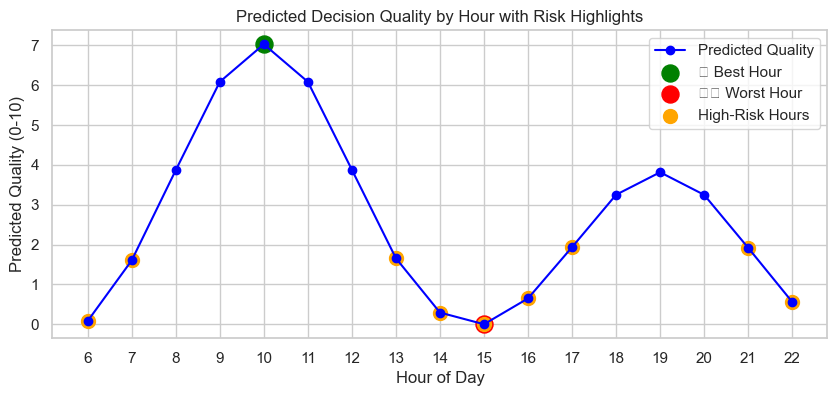

In [26]:
plt.figure(figsize=(10,4))

# Highlight best hour in green
plt.plot(df_forecast["Hour"], df_forecast["Predicted_Quality"], marker="o", color="blue", label="Predicted Quality")
plt.scatter(best_hour["Hour"], best_hour["Predicted_Quality"], color="green", s=150, label="🌟 Best Hour")
plt.scatter(worst_hour["Hour"], worst_hour["Predicted_Quality"], color="red", s=150, label="⚠️ Worst Hour")

# Optional: highlight low-quality hours (<33% of range) as high-risk
low_quality_threshold = q_min + 0.33*q_range
low_risk_hours = df_forecast[df_forecast["Predicted_Quality"] <= low_quality_threshold]
plt.scatter(low_risk_hours["Hour"], low_risk_hours["Predicted_Quality"], color="orange", s=100, label="High-Risk Hours")

plt.title("Predicted Decision Quality by Hour with Risk Highlights")
plt.xlabel("Hour of Day")
plt.ylabel("Predicted Quality (0-10)")
plt.xticks(hours)
plt.grid(True)
plt.legend()
plt.show()


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import ipywidgets as widgets
from IPython.display import display
import os
from datetime import date

sns.set(style="whitegrid", rc={"figure.figsize": (8,5)})

# Step 1: Load datasets
df_sleep = pd.read_csv("sleep_records.csv")       # replace with your file
df_decisions = pd.read_csv("decision_logs.csv")   # replace with your file

df_sleep['date'] = pd.to_datetime(df_sleep['date']).dt.date
df_decisions['date'] = pd.to_datetime(df_decisions['date']).dt.date
df_merged = pd.merge(df_decisions, df_sleep, on="date", how="left")

# Compute sleep_hours
df_merged["bedtime_dt"] = pd.to_datetime(df_merged["bedtime"], format="%H:%M")
df_merged["waketime_dt"] = pd.to_datetime(df_merged["waketime"], format="%H:%M")
df_merged.loc[df_merged["waketime_dt"] < df_merged["bedtime_dt"], "waketime_dt"] += pd.Timedelta(days=1)
df_merged["sleep_hours"] = (df_merged["waketime_dt"] - df_merged["bedtime_dt"]).dt.total_seconds() / 3600

# Train ML Model
features = ["sleep_hours", "sleep_quality", "dream_intensity", "caffeine", "stress", "interruptions"]
X = df_merged[features]
y = df_merged["decision_quality"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

# ----------------------------
# Step 2: Interactive Input Widgets
sleep_hours_slider = widgets.FloatSlider(min=4, max=10, step=0.1, value=7.5, description="Sleep Hours")
sleep_quality_slider = widgets.FloatSlider(min=1, max=10, step=0.1, value=8.0, description="Sleep Quality")
dream_intensity_slider = widgets.FloatSlider(min=1, max=10, step=0.1, value=5.0, description="Dream Intensity")
caffeine_dropdown = widgets.Dropdown(options=[0,1], value=0, description="Caffeine")
stress_slider = widgets.FloatSlider(min=1, max=10, step=0.1, value=4.0, description="Stress")
interruptions_slider = widgets.IntSlider(min=0, max=5, step=1, value=1, description="Interruptions")

input_widgets = widgets.VBox([sleep_hours_slider, sleep_quality_slider,
                              dream_intensity_slider, caffeine_dropdown,
                              stress_slider, interruptions_slider])
display(input_widgets)

# ----------------------------
# Step 3: Forecast + Dynamic Suggestions + Risk Visualization
def forecast_and_save_risk(sleep_hours, sleep_quality, dream_intensity, caffeine, stress, interruptions):
    last_night = {
        "sleep_hours": sleep_hours,
        "sleep_quality": sleep_quality,
        "dream_intensity": dream_intensity,
        "caffeine": caffeine,
        "stress": stress,
        "interruptions": interruptions
    }

    # Base predicted decision quality
    base_quality = model.predict(pd.DataFrame([last_night]))[0]
    base_quality = max(0, min(base_quality, 10))
    print(f"\n--- Predicted Decision Quality: {base_quality:.2f}/10 ---")
    
    # Hourly forecast
    hours = np.arange(6,23)
    morning_peak = np.exp(-0.5*((hours-10)/2)**2)
    evening_peak = 0.6 * np.exp(-0.5*((hours-19)/2)**2)
    energy_raw = morning_peak + evening_peak
    energy_norm = (energy_raw - energy_raw.min()) / (energy_raw.max() - energy_raw.min())
    predicted_quality_by_hour = energy_norm * base_quality
    df_forecast = pd.DataFrame({
        "Hour": hours,
        "Predicted_Quality": predicted_quality_by_hour
    })
    
    # Dynamic thresholds
    q_min = df_forecast["Predicted_Quality"].min()
    q_max = df_forecast["Predicted_Quality"].max()
    q_range = q_max - q_min if q_max - q_min != 0 else 1
    
    # Best/worst hours
    best_hour = df_forecast.loc[df_forecast["Predicted_Quality"].idxmax()]
    worst_hour = df_forecast.loc[df_forecast["Predicted_Quality"].idxmin()]
    
    # Plot with risk highlights
    plt.figure(figsize=(10,4))
    plt.plot(df_forecast["Hour"], df_forecast["Predicted_Quality"], marker="o", color="blue", label="Predicted Quality")
    plt.scatter(best_hour["Hour"], best_hour["Predicted_Quality"], color="green", s=150, label="🌟 Best Hour")
    plt.scatter(worst_hour["Hour"], worst_hour["Predicted_Quality"], color="red", s=150, label="⚠️ Worst Hour")
    
    low_quality_threshold = q_min + 0.33*q_range
    low_risk_hours = df_forecast[df_forecast["Predicted_Quality"] <= low_quality_threshold]
    plt.scatter(low_risk_hours["Hour"], low_risk_hours["Predicted_Quality"], color="orange", s=100, label="High-Risk Hours")
    
    plt.title("Predicted Decision Quality by Hour with Risk Highlights")
    plt.xlabel("Hour of Day")
    plt.ylabel("Predicted Quality (0-10)")
    plt.xticks(hours)
    plt.grid(True)
    plt.legend()
    plt.show()
    
    # Print suggestions dynamically
    print(f"🌟 Best Decision Hour Today: {int(best_hour['Hour'])}:00 (Score: {best_hour['Predicted_Quality']:.2f})")
    print(f"⚠️ Worst Decision Hour Today: {int(worst_hour['Hour'])}:00 (Score: {worst_hour['Predicted_Quality']:.2f})")
    print("\n--- Suggested Decision Timing ---")
    for idx, row in df_forecast.iterrows():
        hour = int(row["Hour"])
        quality = row["Predicted_Quality"]
        if quality >= q_min + 0.66*q_range:
            print(f"{hour}:00 → ✅ Analytical / Financial / Important Decisions")
        elif quality >= q_min + 0.33*q_range:
            print(f"{hour}:00 → ⚡ Creative / Innovative Work")
        else:
            print(f"{hour}:00 → 💤 Routine / Social / Low-Stakes Tasks")
    
    # Save daily report
    filename = "daily_forecast_log.csv"
    df_day = pd.DataFrame({
        "date": [date.today()]*len(hours),
        "hour": hours,
        "predicted_quality": predicted_quality_by_hour,
        "best_hour": [int(best_hour['Hour'])]*len(hours),
        "worst_hour": [int(worst_hour['Hour'])]*len(hours),
        "sleep_hours": [sleep_hours]*len(hours),
        "sleep_quality": [sleep_quality]*len(hours),
        "dream_intensity": [dream_intensity]*len(hours),
        "caffeine": [caffeine]*len(hours),
        "stress": [stress]*len(hours),
        "interruptions": [interruptions]*len(hours)
    })
    if os.path.exists(filename):
        df_day.to_csv(filename, mode='a', index=False, header=False)
    else:
        df_day.to_csv(filename, index=False)
    print(f"✅ Daily forecast saved to '{filename}'")
    
    # Trend plots
    df_log = pd.read_csv(filename)
    df_log['date'] = pd.to_datetime(df_log['date'])
    daily_summary = df_log.groupby('date').agg({
        'predicted_quality': 'max',
        'sleep_hours': 'mean',
        'sleep_quality': 'mean'
    }).reset_index()

    plt.figure(figsize=(10,5))
    plt.plot(daily_summary['date'], daily_summary['predicted_quality'], marker='o', label='Max Predicted Quality')
    plt.plot(daily_summary['date'], daily_summary['sleep_hours'], marker='x', label='Sleep Hours')
    plt.plot(daily_summary['date'], daily_summary['sleep_quality'], marker='s', label='Sleep Quality')
    plt.title("Daily Trends: Sleep vs Predicted Decision Quality")
    plt.xlabel("Date")
    plt.ylabel("Score / Hours")
    plt.legend()
    plt.grid(True)
    plt.show()

# ----------------------------
# Step 4: Interactive Dashboard
interactive_forecast = widgets.interactive(
    forecast_and_save_risk,
    sleep_hours=sleep_hours_slider,
    sleep_quality=sleep_quality_slider,
    dream_intensity=dream_intensity_slider,
    caffeine=caffeine_dropdown,
    stress=stress_slider,
    interruptions=interruptions_slider
)
display(interactive_forecast)


interactive(children=(FloatSlider(value=7.5, description='Sleep Hours', max=10.0, min=4.0), FloatSlider(value=…

In [28]:
# After calculating df_forecast and thresholds
upcoming_hours = df_forecast[df_forecast["Predicted_Quality"] <= q_min + 0.33*q_range]

if not upcoming_hours.empty:
    print("\n⚠️ Alert! High-Risk Hours Today:")
    for hour in upcoming_hours["Hour"]:
        print(f" - {int(hour)}:00 → Avoid major decisions, low cognitive performance expected.")
else:
    print("\n✅ No critical high-risk hours detected today.")



⚠️ Alert! High-Risk Hours Today:
 - 6:00 → Avoid major decisions, low cognitive performance expected.
 - 7:00 → Avoid major decisions, low cognitive performance expected.
 - 13:00 → Avoid major decisions, low cognitive performance expected.
 - 14:00 → Avoid major decisions, low cognitive performance expected.
 - 15:00 → Avoid major decisions, low cognitive performance expected.
 - 16:00 → Avoid major decisions, low cognitive performance expected.
 - 17:00 → Avoid major decisions, low cognitive performance expected.
 - 21:00 → Avoid major decisions, low cognitive performance expected.
 - 22:00 → Avoid major decisions, low cognitive performance expected.


In [29]:
pip install plyer

Note: you may need to restart the kernel to use updated packages.


In [30]:
from plyer import notification

for hour in upcoming_hours["Hour"]:
    notification.notify(
        title="High-Risk Decision Hour",
        message=f"Hour {int(hour)}:00 → Avoid major decisions!",
        timeout=5  # seconds
    )


In [31]:
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

st.title("Sleep-Dream Logic Mapper 🌙")

# Input widgets
sleep_hours = st.slider("Sleep Hours", 4, 10, 7.5)
sleep_quality = st.slider("Sleep Quality", 1, 10, 8.0)
dream_intensity = st.slider("Dream Intensity", 1, 10, 5.0)
caffeine = st.selectbox("Caffeine (0/1)", [0,1])
stress = st.slider("Stress Level", 1, 10, 4)
interruptions = st.slider("Interruptions", 0, 5, 1)

# Predict decision quality (dummy for now)
base_quality = 7.0  # replace with your ML model prediction

hours = np.arange(6,23)
quality_by_hour = base_quality * np.sin((hours-6)/17*np.pi)  # example curve

st.subheader("Predicted Decision Quality by Hour")
fig, ax = plt.subplots()
ax.plot(hours, quality_by_hour, marker="o")
ax.set_xlabel("Hour")
ax.set_ylabel("Predicted Quality")
st.pyplot(fig)

# Suggestions
st.subheader("Suggested Decision Timing")
for h, q in zip(hours, quality_by_hour):
    if q > 5:
        st.write(f"{h}:00 → ✅ Important Decisions")
    elif q > 3:
        st.write(f"{h}:00 → ⚡ Creative Work")
    else:
        st.write(f"{h}:00 → 💤 Routine / Low-Stakes Tasks")


2025-09-19 14:16:57.299 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-19 14:16:57.823 
  command:

    streamlit run C:\Users\knare\AppData\Roaming\Python\Python313\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-09-19 14:16:57.824 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-19 14:16:57.825 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-19 14:16:57.826 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-19 14:16:57.827 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-19 14:16:57.828 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


StreamlitAPIException: Slider value arguments must be of matching types.
`min_value` has int type.
`max_value` has int type.
`step` has float type.

In [32]:
import joblib

# Replace `model` with your trained model variable
joblib.dump(model, "model.pkl")


['model.pkl']